In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#data = pd.read_csv("/content/drive/MyDrive/nerual_network_project/fixed_data.csv")  # Replace with your data file
data = pd.read_csv("../data/fixed_data.csv")

In [20]:
data.columns

Index(['First Term Gpa', 'Second Term Gpa', 'High School Average Mark',
       'Math Score', 'First Language_1', 'First Language_2',
       'First Language_3', 'Funding_1', 'Funding_2', 'Funding_4', 'Funding_5',
       'Funding_8', 'Funding_9', 'School_6', 'FastTrack_1', 'FastTrack_2',
       'Co-op_1', 'Co-op_2', 'Residency_1', 'Residency_2', 'Gender_1',
       'Gender_2', 'Gender_3', 'Previous Education_0', 'Previous Education_1',
       'Previous Education_2', 'Age Group_1', 'Age Group_2', 'Age Group_3',
       'Age Group_4', 'Age Group_5', 'Age Group_6', 'Age Group_7',
       'Age Group_8', 'English Score_1', 'English Score_10', 'English Score_2',
       'English Score_3', 'English Score_4', 'English Score_7',
       'English Score_8', 'English Score_9'],
      dtype='object')

In [23]:
# Step 2: Feature Selection
features = [
    "First Term Gpa",
    "Second Term Gpa",
    "High School Average Mark",
    "Math Score",
]

In [24]:
X = data[features]

In [25]:
# Step 3: Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Step 4: Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Change n_clusters based on your data
clusters = kmeans.fit_predict(X_scaled)

In [27]:
# Step 5: Add Cluster Labels to Data
data["Cluster"] = clusters

In [28]:
# Step 6: Analyze Clusters
print(data.groupby("Cluster").mean())

         First Term Gpa  Second Term Gpa  High School Average Mark  \
Cluster                                                              
0             -0.927734        -0.850655                 -0.573318   
1              0.590665         0.541590                  0.365017   

         Math Score  First Language_1  First Language_2  First Language_3  \
Cluster                                                                     
0         -0.630852          0.690519          0.003578          0.305903   
1          0.401647          0.506834          0.002278          0.490888   

         Funding_1  Funding_2  Funding_4  ...  Age Group_7  Age Group_8  \
Cluster                                   ...                             
0         0.019678   0.697674   0.270125  ...     0.010733     0.001789   
1         0.018223   0.462415   0.481777  ...     0.035308     0.009112   

         English Score_1  English Score_10  English Score_2  English Score_3  \
Cluster                      

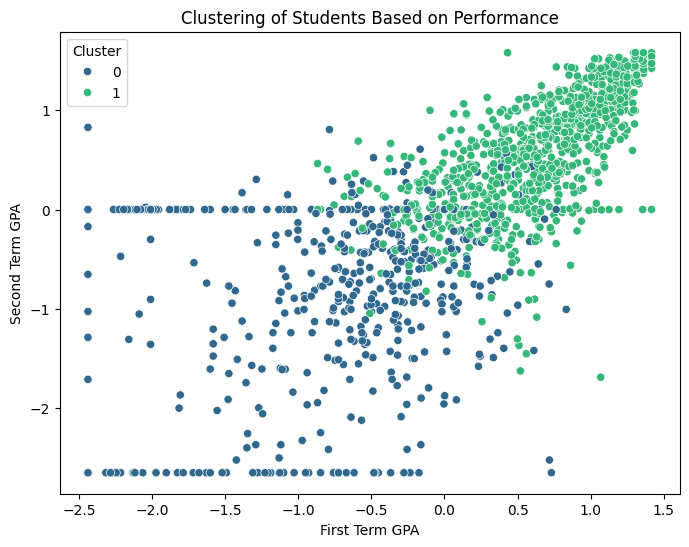

In [30]:
# Step 7: Visualize Clusters (2D Projection for Example)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data["First Term Gpa"],
    y=data["Second Term Gpa"],
    hue=data["Cluster"],
    palette="viridis"
)
plt.title("Clustering of Students Based on Performance")
plt.xlabel("First Term GPA")
plt.ylabel("Second Term GPA")
plt.legend(title="Cluster")
plt.show()

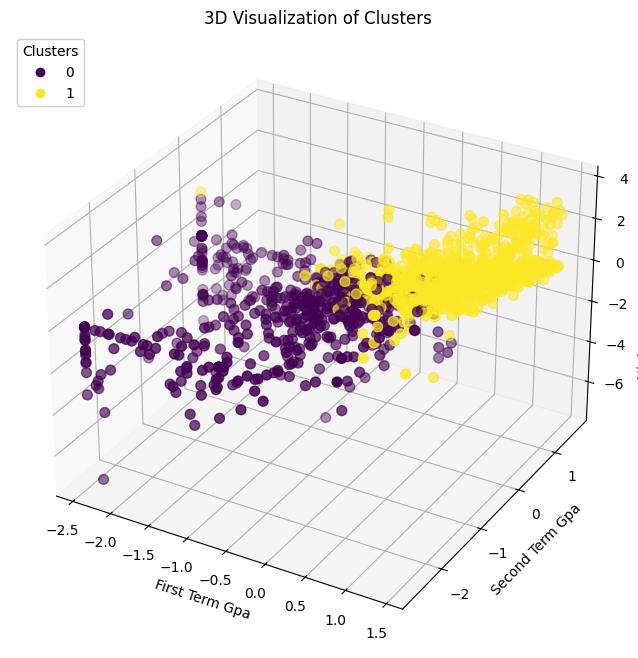

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Choose three features for visualization
feature1 = "First Term Gpa"
feature2 = "Second Term Gpa"
feature3 = "High School Average Mark"

# Extract the relevant columns
X_3D = data[[feature1, feature2, feature3]]

# Plotting in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster labels as hue
scatter = ax.scatter(
    X_3D[feature1],
    X_3D[feature2],
    X_3D[feature3],
    c=data["Cluster"],  # Color by cluster
    cmap="viridis",
    s=50
)

# Adding labels and title
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
plt.title("3D Visualization of Clusters")

# Add legend for clusters
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters", loc="upper left")
ax.add_artist(legend1)

# Show the plot
plt.show()


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Step 1: Prepare the data
# Assume 'data' is your DataFrame and 'Cluster' is the target column.
data["Completion"] = data["Cluster"].map({0: 0, 1: 1})  # Map clusters to completion status

# Features and target
X = data.drop(columns=["Cluster", "Completion"])
y = data["Completion"]

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Define the neural network
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.1),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Step 5: Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Step 7: Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Step 8: Map predictions to completion status
y_pred_labels = ["Completion" if pred == 1 else "Not Completion" for pred in y_pred.flatten()]

# Display predictions
for i, pred in enumerate(y_pred_labels[:10]):
    print(f"Student {i+1}: {pred}")


Epoch 1/10


d:\fall2024\neural network\project\code\scripts\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5881 - loss: 0.6282 - val_accuracy: 0.8217 - val_loss: 0.4743
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8749 - loss: 0.3865 - val_accuracy: 0.8565 - val_loss: 0.3544
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8798 - loss: 0.3043 - val_accuracy: 0.8957 - val_loss: 0.2762
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9346 - loss: 0.2090 - val_accuracy: 0.9130 - val_loss: 0.2220
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9601 - loss: 0.1687 - val_accuracy: 0.9217 - val_loss: 0.1963
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9664 - loss: 0.1223 - val_accuracy: 0.9391 - val_loss: 0.1672
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9559 - loss: 0.1172 - val_accuracy: 0.9391 - val_loss: 0.1583
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9739 - loss: 0.0896 - val_accuracy: 0.9348 - val_loss: 0.1479
Epo

In [33]:
model.save("../models/completion_prediction_model.keras")
